In [1]:
# imports and stuff
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

%run -i util.py

### setup stuff

In [2]:
MAIN_FOLDER = '../alcala_henares_20180211.prepared/'
IMGS_FOLDER = MAIN_FOLDER + '/rgb'
LABELS_FOLDER = MAIN_FOLDER + '/labels'
IN_CHANNELS=3
LABELS = ["roads", "buildings", "low veg.", "trees", "cars", "clutter"] # Label names
N_CLASSES = len(LABELS) # Number of classes
WEIGHTS = torch.ones(N_CLASSES) # Weights for class balancing

### create net

In [3]:
net = SegNet( in_channels=IN_CHANNELS, out_channels=N_CLASSES)

### load weights from training

In [4]:
net.load_state_dict(torch.load('./CAT_segnet256_epoch26'))
net.cuda();

### load random image from ALCALÁ

In [5]:
g = GMAPS_dataset(IMGS_FOLDER, LABELS_FOLDER, window_size=(256, 256))

(-0.5, 255.5, 255.5, -0.5)

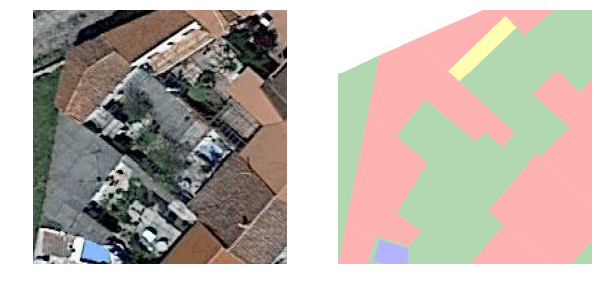

In [14]:
k = np.random.randint(len(g.data_files))
img = np.asarray(io.imread(g.data_files[k]), dtype='float32') / 255
lab = np.asarray(io.imread(g.label_files[k]), dtype='float32') / 255

simg = img[:256,:256,:]
slab = lab[:256,:256,:]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(simg)
plt.axis("off")
plt.subplot(122)
plt.imshow(slab)
plt.axis("off")

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

util.py:284: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.conv1_1_D(x))


(65536,) (65536,)
accuracy 0.57


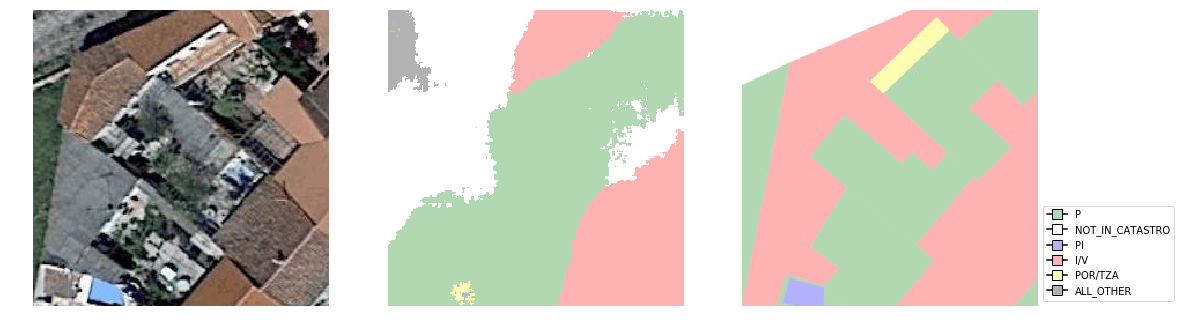

In [15]:
simg = img[:256,:256,:]
slab = lab[:256,:256,:]

pred = get_prediction(simg, net, stride=256, window_size=(256,256), batch_size=10)
p = pred.flatten()
l = np.asarray(convert_label_to_single_channel(slab*255), dtype='int64').flatten()
print (p.shape, l.shape)
print ("accuracy %.2f"%np.mean(p==l))
cat_show_img_and_pred(simg, pred, slab)


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

util.py:284: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.conv1_1_D(x))


(65536,) (65536,)
accuracy 0.74


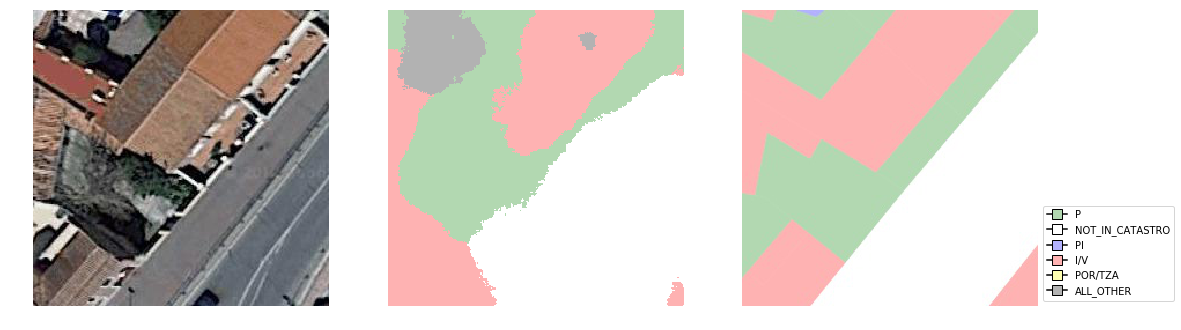

In [16]:
simg = img[256:512,:256,:]
slab = lab[256:512,:256,:]

pred = get_prediction(simg, net, stride=256, window_size=(256,256), batch_size=10)
p = pred.flatten()
l = np.asarray(convert_label_to_single_channel(slab*255), dtype='int64').flatten()
print (p.shape, l.shape)
print ("accuracy %.2f"%np.mean(p==l))
cat_show_img_and_pred(simg, pred, slab)

### predict

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

util.py:284: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.conv1_1_D(x))


accuracy 0.68


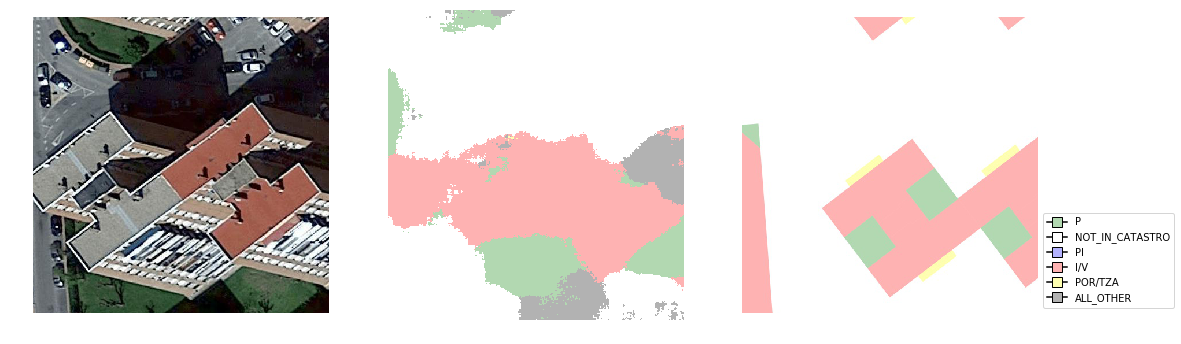

In [28]:
pred = get_prediction(img[34:-34,44:-44], net, stride=512, window_size=(512,512), batch_size=10)
p = pred.flatten()
l = np.asarray(convert_label_to_single_channel(lab[34:-34,44:-44]*255), dtype='int64').flatten()
print ("accuracy %.2f"%np.mean(p==l))
cat_show_img_and_pred(img[34:-34,44:-44], pred[34:-34,44:-44], lab[34:-34,44:-44])

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))

util.py:284: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.conv1_1_D(x))


accuracy 0.46


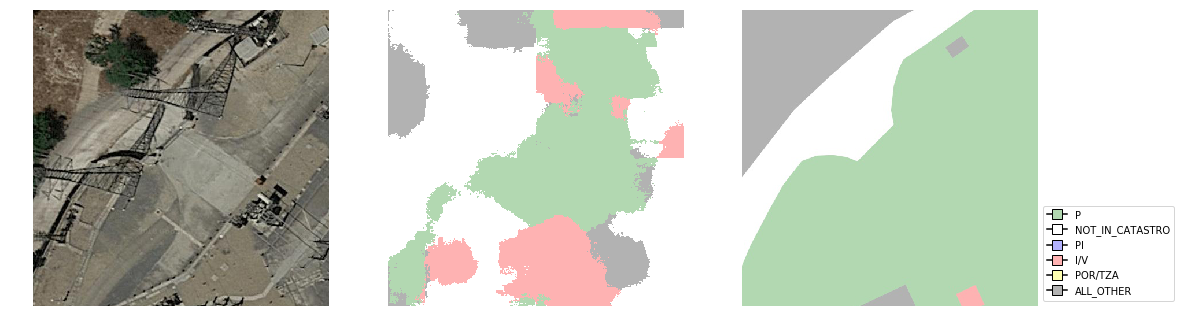

In [23]:
pred = get_prediction(img[34:-34,44:-44], net, stride=32, window_size=(256,256), batch_size=10)
p = pred.flatten()
l = np.asarray(convert_label_to_single_channel(lab[34:-34,44:-44]*255), dtype='int64').flatten()
print ("accuracy %.2f"%np.mean(p==l))
cat_show_img_and_pred(img[34:-34,44:-44], pred, lab[34:-34,44:-44])

### load random patch from POSTDAM

(-0.5, 599.5, 599.5, -0.5)

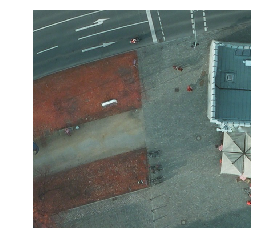

In [23]:
_, files,_  = command("ls ../ISPRS_BENCHMARK_DATASETS/Potsdam/3_Ortho_IRRG/*jpg")
file = files[np.random.randint(len(files))].decode("utf8")
img = np.asarray(io.imread(file), dtype='float32') / 255
t1 = np.random.randint(img.shape[0]-600)
img = img[t1:t1+600, t1:t1+600]
plt.imshow(img)
plt.axis("off")

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

util.py:284: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.conv1_1_D(x))


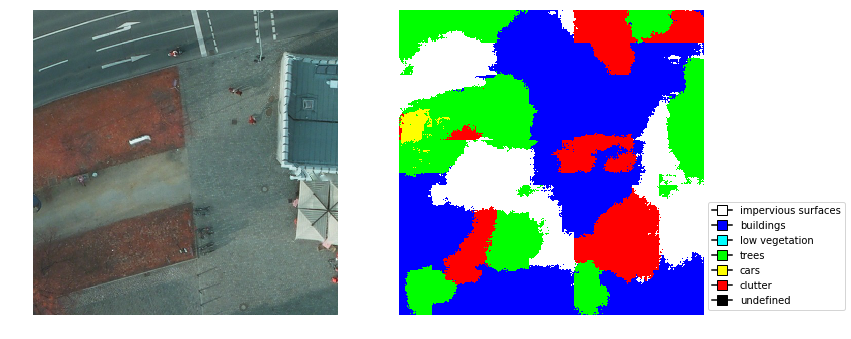

In [24]:
pred = get_prediction(img, net, stride=64, window_size=(256,256), batch_size=5)
cat_show_img_and_pred(img, pred)

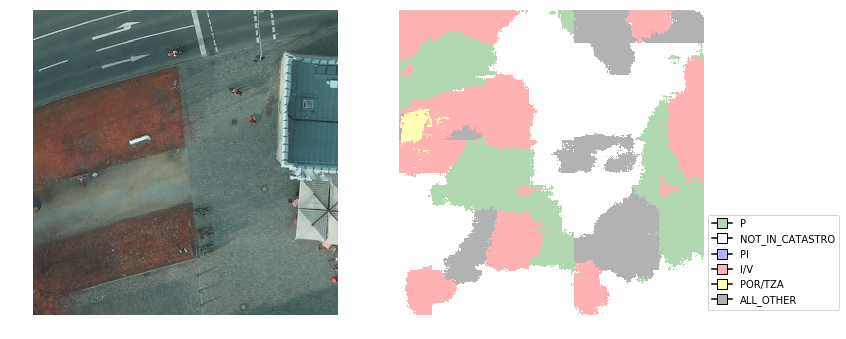

In [25]:
cat_show_img_and_pred(img, pred)

In [84]:
a = np.random.randint(10, size=(10,5))
import pandas as pd
a = pd.DataFrame(a, columns=["A", "B", "C", "D", "E"])
a

,A,B,C,D,E
0,7,1,7,1,0
1,3,9,0,4,9
2,3,5,4,7,6
3,7,0,2,0,0
4,9,8,3,4,2
5,6,2,2,1,9
6,5,3,9,0,3
7,3,7,7,9,6
8,2,7,3,3,3
9,9,7,2,2,3


In [87]:
a[[i for i in a.columns if i!="C"]]

,A,B,D,E
0,7,1,1,0
1,3,9,4,9
2,3,5,7,6
3,7,0,0,0
4,9,8,4,2
5,6,2,1,9
6,5,3,0,3
7,3,7,9,6
8,2,7,3,3
9,9,7,2,3


In [79]:
range(3)+range(4,8)

TypeError: unsupported operand type(s) for +: 'range' and 'range'

In [80]:
range(3)

range(0, 3)